In [2]:
!pip install ipython-sql


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.1 MB 3.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 3.2 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [ipython-genutils]
   ---------------------------------------- 0/6 [ipython-genutils]
   ------ --------------------------------- 1/6 [sqlparse]
   ------ --------------------------------- 1/6 [sqlparse]
   ------------- -------------------------- 2/6 [prettytable]
   -------------------- ------------------- 3/6 [greenlet]
   -------------------- ------------------- 3/6 [greenlet]
   -------------------- ------------------- 3/6 [greenlet]
   -------------------------- ------------- 4/6 [sqlalchemy]
   -------------------------- ------------- 4/6 [sqlalchemy]
   -----------------

In [16]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("Chinook.sqlite") 


# Top Selling Products

In [19]:
query = """
SELECT Track.Name AS Product, SUM(InvoiceLine.Quantity) AS Units_Sold
FROM InvoiceLine
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
GROUP BY Track.TrackId
ORDER BY Units_Sold DESC
LIMIT 10;
"""

# Run the query and load results into a DataFrame
top_products_df = pd.read_sql(query, conn)
top_products_df


,Product,Units_Sold
0,Balls to the Wall,2
1,Inject The Venom,2
2,Snowballed,2
3,Overdose,2
4,Deuces Are Wild,2
5,Not The Doctor,2
6,Por Causa De Você,2
7,Welcome Home (Sanitarium),2
8,Snowblind,2
9,Cornucopia,2


# Revenue/Region

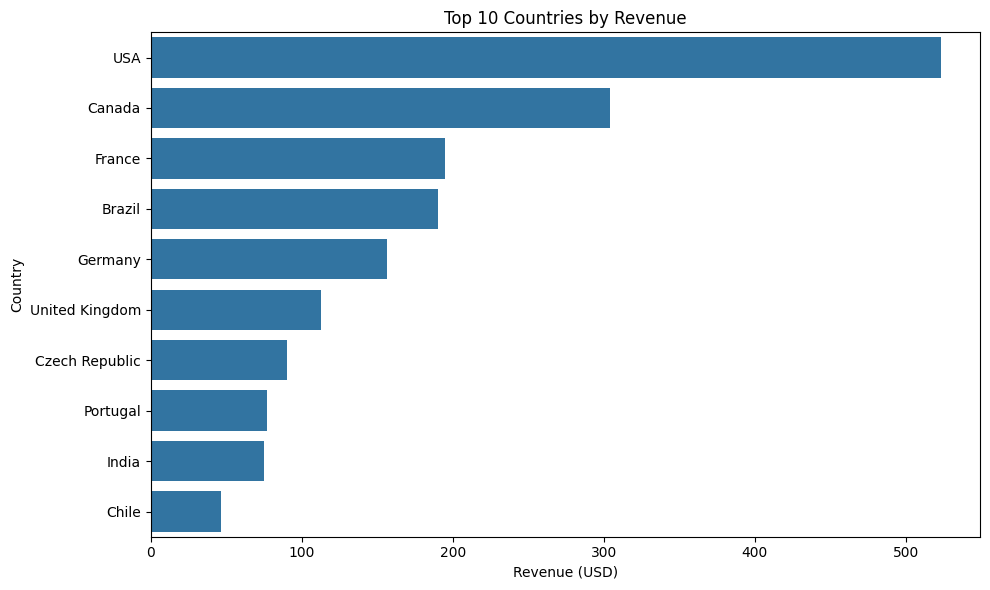

In [22]:
query_revenue_per_region = """
SELECT BillingCountry AS Region, ROUND(SUM(Total), 2) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC;
"""

revenue_by_region_df = pd.read_sql(query_revenue_per_region, conn)
revenue_by_region_df
top_regions = revenue_by_region_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_regions, x='Revenue', y='Region')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



# Monthly Performance

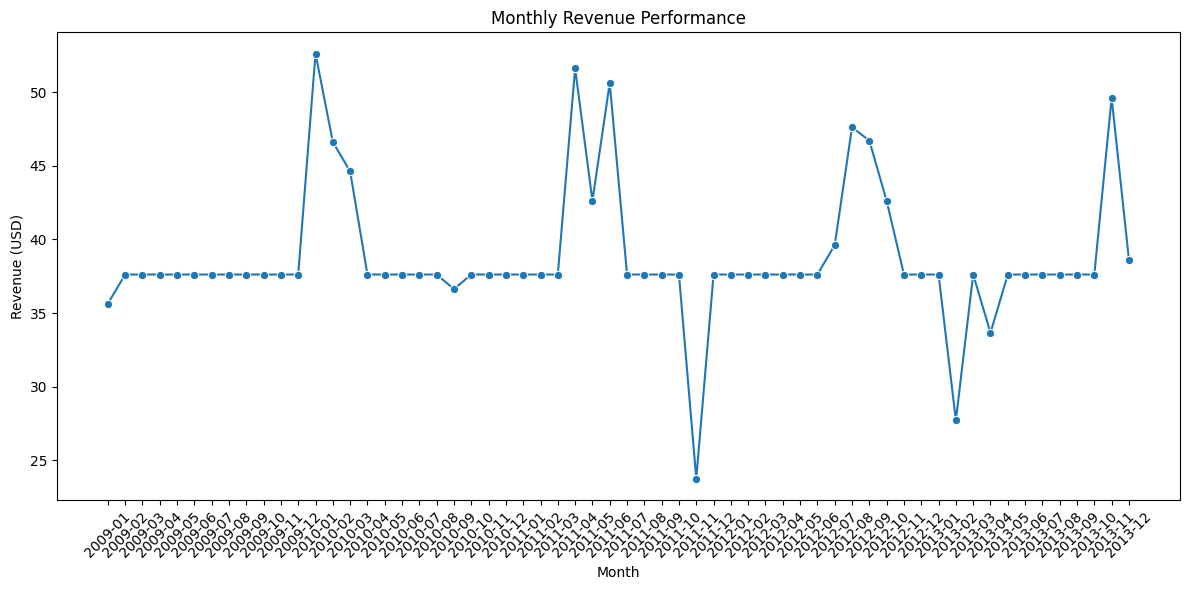

In [23]:
query_monthly_performance = """
SELECT 
    strftime('%Y-%m', InvoiceDate) AS Month,
    ROUND(SUM(Total), 2) AS Revenue
FROM Invoice
GROUP BY Month
ORDER BY Month;
"""

monthly_perf_df = pd.read_sql(query_monthly_performance, conn)
monthly_perf_df
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_perf_df, x='Month', y='Revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Performance")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()


# Window Function with Rank

In [25]:
query_ranked_regions = """
SELECT 
    BillingCountry AS Country,
    ROUND(SUM(Total), 2) AS Revenue,
    RANK() OVER (ORDER BY SUM(Total) DESC) AS RevenueRank
FROM Invoice
GROUP BY BillingCountry
ORDER BY RevenueRank;
"""

ranked_df = pd.read_sql(query_ranked_regions, conn)
ranked_df


,Country,Revenue,RevenueRank
0,USA,523.06,1
1,Canada,303.96,2
2,France,195.10,3
3,Brazil,190.10,4
4,Germany,156.48,5
5,United Kingdom,112.86,6
6,Czech Republic,90.24,7
7,Portugal,77.24,8
8,India,75.26,9
9,Chile,46.62,10
